In [45]:
%matplotlib notebook
import gymnasium as gym

In [25]:
#creating the environment
env = gym.make("MountainCar-v0",render_mode='rgb_array')
#reseting the enironment
state, info = env.reset()

In [40]:
def action_creation_function(state):#separate action function to get better results
    if state[1] > 0:return 2
    else : return 0

In [26]:
state

array([-0.45964596,  0.        ], dtype=float32)

In [27]:
print(env.action_space)

Discrete(3)


In [28]:
print(env.observation_space)

Box([-1.2  -0.07], [0.6  0.07], (2,), float32)


In [29]:
#trying for one step
action = env.action_space.sample()
state, reward,done,truncated,info = env.step(action)
env.render()
env.close()
print(f"state:{state} done:{done} truncated: {truncated} info: {info}")

state:[-0.46112266 -0.00147671] done:False truncated: False info: {}


In [41]:
#testing 
import matplotlib.pyplot as plt 
done = False
steps = 0
#run till max 100 steps
while not done and steps < 100:
    #take a random action
    action = action_creation_function(state)
    state, reward,done,truncated,info = env.step(action)
    print(state)
    env.render()
    steps+=1
env.close()

[-0.4649881   0.00449133]
[-0.4599341   0.00505401]
[-0.45435467  0.00557943]
[-0.44829085  0.00606382]
[-0.44178703  0.00650381]
[-0.4348907   0.00689636]
[-0.42765182  0.00723887]
[-0.42012265  0.00752917]
[-0.41235715  0.0077655 ]
[-0.40441054  0.00794659]
[-0.39633894  0.0080716 ]
[-0.38819876  0.00814017]
[-0.3800464   0.00815237]
[-0.3719377  0.0081087]
[-0.36392763  0.00801008]
[-0.3560698   0.00785782]
[-0.3484162   0.00765359]
[-0.34101686  0.00739937]
[-0.33391938  0.00709746]
[-0.32716897  0.0067504 ]
[-0.320808    0.00636098]
[-0.31487587  0.00593215]
[-0.3094088   0.00546703]
[-0.30443993  0.0049689 ]
[-0.29999882  0.00444109]
[-0.29611176  0.00388706]
[-0.29280147  0.0033103 ]
[-0.29008713  0.00271435]
[-0.28798434  0.00210278]
[-0.28650513  0.00147919]
[-0.28565797  0.00084718]
[-2.8544760e-01  2.1036094e-04]
[-0.28587526 -0.00042765]
[-0.2889385  -0.00306324]
[-0.29461986 -0.00568138]
[-0.3028867  -0.00826681]
[-0.3136905  -0.01080382]
[-0.3269666  -0.01327612]
[-0.3426

 ## Implement the CartPole environment for a certain number of steps 

<IPython.core.display.Javascript object>


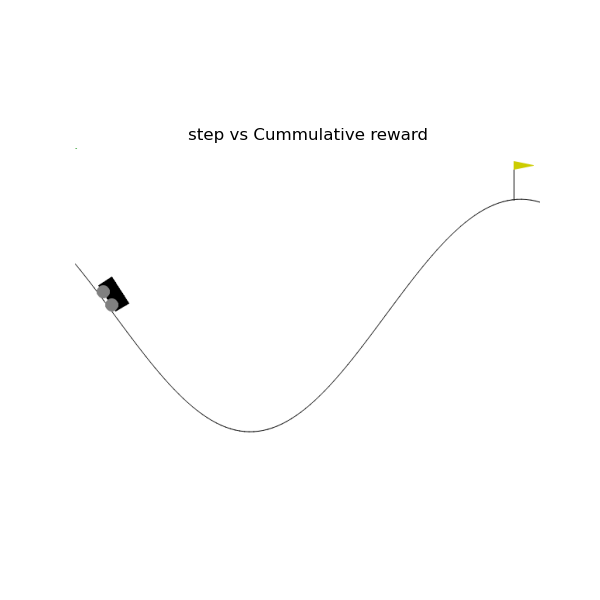

In [46]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

#TRY-> the render using human mode and pop not this animation one
steps = 100
obs, info = env.reset()
done = False
truncated = False
Frames = []
cum_reward = 0
# Loop to get frames
for i in range(steps):
    while not done and not truncated:
        action = action_creation_function(state)
        state, reward, done, truncated, info = env.step(action)
        env_screen = env.render()
        cum_reward += reward
        Frames.append(env_screen)
env.close()

# Now animate the frames using matplotlib
fig = plt.figure(figsize=(6, 6))

# This function will update the plot with the current frame
def update_frame(frame_idx):
    plt.imshow(Frames[frame_idx])
    plt.axis('off')  # Hide axes
    return plt.gca().images

# Create the animation using FuncAnimation
ani = animation.FuncAnimation(fig, update_frame, frames=len(Frames), interval=50, blit=True)

# Display the animation
plt.show()


In [43]:
print(f"The reward for implementing using steps is {cum_reward}")

The reward for implementing using steps is -119.0


## Implement the CartPole environment for a certain number of episodes

In [44]:
Episodes = 20
episode_reward = []


for i in range(Episodes):
    obs,info = env.reset()#reset for every episode
    done = False
    truncated = False
    reward_for_episode = 0
    #run episode for steps
    steps = 0
    while not done and not truncated and steps <1500:
        action = action_creation_function(state)
        state,reward,done,truncated,info = env.step(action)
        reward_for_episode += reward#cummulate for the episode
        steps+=1
    #append final cumulative reward for the episode
    episode_reward.append(reward_for_episode)
    
#close once done
env.close()
print(f"the cummulative scores for 20 episodes are \n {episode_reward}")

the cummulative scores for 20 episodes are 
 [-114.0, -122.0, -121.0, -120.0, -122.0, -120.0, -124.0, -116.0, -117.0, -124.0, -121.0, -122.0, -123.0, -121.0, -114.0, -122.0, -117.0, -121.0, -122.0, -120.0]


 ## Plot the cumulative reward of the games and note down the results.

In [55]:
Episodes = 20
episode_reward = []
steps_reward = []

for i in range(Episodes):
    obs,info = env.reset()#reset for every episode
    done = False
    truncated = False
    steps_reward.append([])#list for each episode
    reward_for_episode = 0
    steps = 0
    #run episode for steps
    while not done and not truncated and steps < 1500:
        action = action_creation_function(state)
        state,reward,done,truncated,info = env.step(action)
        reward_for_episode += reward#cummulate for the episode
        steps_reward[i].append(reward_for_episode)#append for the this step of the episdoe
        steps+=1
    #append final cumulative reward for the episode
    episode_reward.append(reward_for_episode)
    
#close once done
env.close()

In [56]:
%matplotlib inline

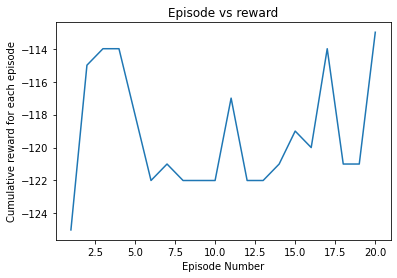

In [57]:
#plotting accross 20episodes the cum reward vs the episode
import matplotlib.pyplot as plt
plt.plot(range(1,21),episode_reward)
plt.xlabel("Episode Number")
plt.ylabel("Cumulative reward for each episode")
plt.title("Episode vs reward")
plt.show()

In [58]:
steps_reward[0]

[-1.0,
 -2.0,
 -3.0,
 -4.0,
 -5.0,
 -6.0,
 -7.0,
 -8.0,
 -9.0,
 -10.0,
 -11.0,
 -12.0,
 -13.0,
 -14.0,
 -15.0,
 -16.0,
 -17.0,
 -18.0,
 -19.0,
 -20.0,
 -21.0,
 -22.0,
 -23.0,
 -24.0,
 -25.0,
 -26.0,
 -27.0,
 -28.0,
 -29.0,
 -30.0,
 -31.0,
 -32.0,
 -33.0,
 -34.0,
 -35.0,
 -36.0,
 -37.0,
 -38.0,
 -39.0,
 -40.0,
 -41.0,
 -42.0,
 -43.0,
 -44.0,
 -45.0,
 -46.0,
 -47.0,
 -48.0,
 -49.0,
 -50.0,
 -51.0,
 -52.0,
 -53.0,
 -54.0,
 -55.0,
 -56.0,
 -57.0,
 -58.0,
 -59.0,
 -60.0,
 -61.0,
 -62.0,
 -63.0,
 -64.0,
 -65.0,
 -66.0,
 -67.0,
 -68.0,
 -69.0,
 -70.0,
 -71.0,
 -72.0,
 -73.0,
 -74.0,
 -75.0,
 -76.0,
 -77.0,
 -78.0,
 -79.0,
 -80.0,
 -81.0,
 -82.0,
 -83.0,
 -84.0,
 -85.0,
 -86.0,
 -87.0,
 -88.0,
 -89.0,
 -90.0,
 -91.0,
 -92.0,
 -93.0,
 -94.0,
 -95.0,
 -96.0,
 -97.0,
 -98.0,
 -99.0,
 -100.0,
 -101.0,
 -102.0,
 -103.0,
 -104.0,
 -105.0,
 -106.0,
 -107.0,
 -108.0,
 -109.0,
 -110.0,
 -111.0,
 -112.0,
 -113.0,
 -114.0,
 -115.0,
 -116.0,
 -117.0,
 -118.0,
 -119.0,
 -120.0,
 -121.0,
 -122.0,
 -123.0,
 

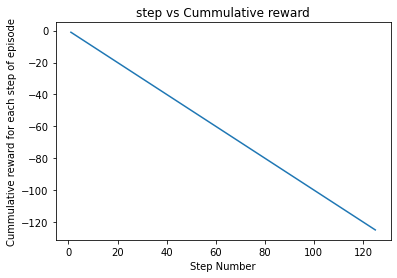

In [59]:
#plotting across steps the reward
#plotting across the first episode steps
import matplotlib.pyplot as plt
plt.plot(range(1,len(steps_reward[0])+1),steps_reward[0])
plt.xlabel("Step Number")
plt.ylabel("Cummulative reward for each step of episode")
plt.title("step vs Cummulative reward")
plt.show()

## Compare and comment on the rewards earned for both approaches. 